### Step 0. row data

In [17]:
import os
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.cluster import DBSCAN

In [18]:
def get_XY(folder_path, set_color):
    y_age = []
    all_data = []
    file_names = os.listdir(folder_path)
    for file_name in file_names:
        # Y
        age = int(file_name[2])
        y_age.append(age)
        # X
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)
        if set_color == 'all':
            selected_data = df.iloc[:, -3:].values.T
        elif set_color == 'R':
            selected_data = df.iloc[:, -3:-2].values.T
        elif set_color == 'G':
            selected_data = df.iloc[:, -2:-1].values.T
        elif set_color == 'B':
            selected_data = df.iloc[:, -1:].values.T
        all_data.append(selected_data)
    # 轉numpy array
    data = np.array(all_data)
    reshaped_data = data.reshape((len(file_names), -1))
    y_true = np.array(y_age)
    return reshaped_data, y_true

In [19]:
f_path = 'C:/Users/zombie/PycharmProjects/NTUE_ThesisProject_ImageProcessing/datasets/frames_row_data_Ruifang'
X_all, y_true = get_XY(folder_path=f_path, set_color='all')
X_red, y_true = get_XY(folder_path=f_path, set_color='R')
X_green, y_true = get_XY(folder_path=f_path, set_color='G')
X_brown, y_true = get_XY(folder_path=f_path, set_color='B')
print("X_all : ", X_all.shape, "\n", X_all[0][:10])
print("X_red : ", X_red.shape, "\n", X_red[0][:10])
print("X_green : ", X_green.shape, "\n", X_green[0][:10])
print("X_brown : ", X_brown.shape, "\n", X_brown[0][:10])
print("y_true : ", y_true.shape, "\n", y_true[0])

X_all :  (54, 1800) 
 [5097 5214 5244 5032 5030 5012 5054 4951 5035 4892]
X_red :  (54, 600) 
 [5097 5214 5244 5032 5030 5012 5054 4951 5035 4892]
X_green :  (54, 600) 
 [10227 10248 10328 10337 10330 10314 10284 10288 10234 10293]
X_brown :  (54, 600) 
 [32474 32383 32468 32484 32633 33040 32921 33020 32896 33185]
y_true :  (54,) 
 3


### Step 1. DTW (find Reference)

In [23]:
from dtw import dtw
def call_DTW(X, Y):
    l2_norm = lambda X, Y: (X - Y) ** 2
    dist, cost_matrix, acc_cost_matrix, path = dtw(X, Y, dist=l2_norm)
    return dist

In [24]:
def DTWtoReference(color):
    if color == 'red':
        work_list = X_red
    if color == 'green':
        work_list = X_green
    if color == 'brown':
        work_list = X_brown
    all_dist = []
    loop_cnt = 0
    for work1 in work_list:
        loop_cnt += 1
        work1_dist = 0
        for work2 in work_list:
            dist = call_DTW(work1, work2) / (10**5)
            work1_dist += dist
        all_dist.append(work1_dist)
    # reference_data_index = all_dist.index(min(all_dist))
    # print(f"reference : index[{all_dist.index(min(all_dist))}] min={min(all_dist)}")
    return all_dist

In [6]:
red_dist = DTWtoReference(color='red')

In [10]:
green_dist = DTWtoReference(color='green')

In [11]:
brown_dist = DTWtoReference(color='brown')

In [14]:
with open('red_dist.txt', 'w') as f:
    for line in red_dist:
        f.write(str(red_dist.index(line)))
        f.write('  ')
        f.write(str(line))
        f.write('\n')
Sort_red = sorted(red_dist)
print("Red : ")
for r in Sort_red:
    print(f"[{red_dist.index(r)}] ", end='')

with open('green_dist.txt', 'w') as f:
    for line in green_dist:
        f.write(str(green_dist.index(line)))
        f.write('  ')
        f.write(str(line))
        f.write('\n')
Sort_green = sorted(green_dist)
print("\nGreen : ")
for g in Sort_green:
    print(f"[{green_dist.index(g)}] ", end='')

with open('brown_dist.txt', 'w') as f:
    for line in brown_dist:
        f.write(str(brown_dist.index(line)))
        f.write('  ')
        f.write(str(line))
        f.write('\n')
Sort_brown = sorted(brown_dist)
print("\nBrown : ")
for r in Sort_brown:
    print(f"[{brown_dist.index(r)}] ", end='')

Red : 
[25] [45] [43] [11] [31] [30] [48] [18] [19] [27] [10] [32] [16] [39] [26] [51] [12] [49] [52] [17] [46] [42] [44] [40] [53] [14] [50] [29] [5] [13] [23] [34] [37] [20] [21] [41] [38] [22] [47] [33] [36] [9] [24] [35] [15] [3] [28] [4] [1] [8] [7] [6] [2] [0] 
Green : 
[5] [37] [48] [27] [25] [45] [15] [33] [26] [51] [20] [44] [21] [7] [47] [43] [29] [4] [16] [24] [11] [31] [22] [12] [39] [52] [53] [50] [36] [0] [14] [13] [35] [8] [34] [38] [40] [1] [9] [49] [46] [18] [19] [30] [41] [32] [42] [28] [2] [17] [10] [23] [6] [3] 
Brown : 
[4] [14] [35] [26] [39] [28] [32] [49] [50] [21] [36] [43] [46] [12] [33] [29] [53] [45] [16] [31] [34] [25] [7] [27] [37] [18] [30] [24] [13] [48] [44] [51] [5] [17] [40] [47] [52] [20] [23] [15] [9] [19] [42] [22] [38] [41] [1] [3] [8] [10] [11] [6] [2] [0] 

In [14]:
reference_data_index = 25

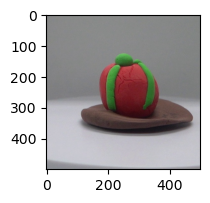

In [15]:
from PIL import Image
import os
import matplotlib.pyplot as plt

f_path = 'C:/Users/zombie/PycharmProjects/NTUE_ThesisProject_ImageProcessing/data_testimage/data_testimage_TPH_Ruifang/'
reference_path = f_path + os.listdir(f_path)[reference_data_index]
tomato_img = Image.open(reference_path)

fig = plt.gcf()
fig.set_size_inches(2,2)
plt.imshow(tomato_img, cmap='binary')
plt.show()

### Step 2. circular DTW (find bias)

In [25]:
# 以紅色為基準
reference_X0 = X_red[reference_data_index] # index[25]

In [26]:
import csv
def circularDTW():
    # 以紅色為基準
    work_list = X_red
    # 循環對齊後，存為redCSV，紀錄偏移量 bias
    with open('shift_red.csv', 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        bias_list = []
        for i in range(len(work_list)):
            work = work_list[i]
            min_distance = call_DTW(work, reference_X0)
            min_work = work
            bias = 0
            for shift in range(len(work)):
                work = np.append(work[1:],[work[0]]) # 將[0]移至[last]
                dist = call_DTW(work, reference_X0)
                if dist < min_distance:
                    min_distance = dist
                    min_work = work
                    # 偏移量 bias
                    bias = shift+1
            # 紀錄偏移量 bias
            bias_list.append(bias)
            # writerow
            new_row = min_work - reference_X0
            writer.writerow(new_row)
    return bias_list

In [27]:
red_bias_list = circularDTW()

In [30]:
print(red_bias_list)
with open('get_bias_from_red_idx25.txt', 'w') as f:
    for line in red_bias_list:
        f.write(str(red_bias_list.index(line)))
        f.write('  ')
        f.write(str(line))
        f.write('\n')

[427, 66, 588, 408, 226, 163, 185, 589, 587, 89, 244, 349, 545, 542, 564, 576, 598, 306, 385, 311, 564, 358, 439, 321, 21, 0, 432, 79, 9, 507, 488, 180, 255, 409, 574, 536, 494, 497, 1, 455, 174, 512, 369, 591, 169, 116, 149, 293, 135, 150, 461, 308, 468, 599]


### Step 3. align with reference

In [35]:
# 以index[25]紅色為基準的偏移量 red_bias_list
# shift 綠色與棕色
def shift_row_data(color):
    if color == 'green':
        work_list = X_green
        reference_X = X_green[reference_data_index] # index[25]
    if color == 'brown':
        work_list = X_brown
        reference_X = X_brown[reference_data_index] # index[25]
    # 循環對齊
    with open(f'shift_{color}.csv', 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        for i in range(len(work_list)):
            red_bias = red_bias_list[i]
            work = work_list[i]
            for _ in range(red_bias):
                work = np.append(work[1:],[work[0]])
            # writerow
            new_row = work - reference_X
            writer.writerow(new_row)

In [36]:
shift_row_data('green')

In [37]:
shift_row_data('brown')

### Step 4-0. Data

In [ ]:
import os
import numpy as np
def get_Y(folder_path):
    y_age = []
    file_names = os.listdir(folder_path)
    for file_name in file_names:
        age = int(file_name[2])
        y_age.append(age)
    # 轉numpy array
    y_true = np.array(y_age)
    return y_true

In [ ]:
f_path = 'C:/Users/zombie/PycharmProjects/NTUE_ThesisProject_ImageProcessing/datasets/frames_row_data_Ruifang'
y_true = get_Y(folder_path=f_path)
print("y_true : ", y_true.shape, "\n", y_true[0])

In [ ]:
import pandas as pd
X_data = np.array(pd.read_csv("row_data_1800RF.csv", header=None))
print("X_data : ", X_data.shape, "\n", X_data[0])

### Step 4-1. Kmeans

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
silhouette_avg = []
for i in range(2,20):
    kmeans_fit = KMeans(n_clusters=i, max_iter=1000).fit(X_data)
    silhouette_avg.append(silhouette_score(X_data, kmeans_fit.labels_))
plt.plot(range(2,20), silhouette_avg)

In [ ]:
k_means = KMeans(n_clusters=3, max_iter=1000)
k_means.fit(X_data) # 訓練
y_kmeans = k_means.predict(X_data) # 預測

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(y_true, y_kmeans)

### Step 4-2. DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=150000, min_samples=5).fit(X_data)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)